In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import calendar
%matplotlib inline

In [364]:
link_prefix = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
dates = [150704, 150711, 150718, 150725]
files = []

for i in range(len(dates)):
    files.append(link_prefix + str(dates[i]) + ".txt")


In [365]:
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs)

In [366]:
df.columns = list(map(lambda x: x.strip(), df.columns))
df.columns = list(map(lambda x: x.lower(), df.columns))

In [565]:
stations = ['GRD CNTRL-42 ST', 'JAMAICA-179 ST', 'LEXINGTON AV/53', 
            'ROOSEVELT IS', 'SOUTH FERRY', 'WALL ST', 'HIGH ST', 
            'BOROUGH HALL/CT', 'JAY ST-METROTEC', 'YORK ST', 
            'QUEENSBORO PLZ', '34 ST-HERALD SQ', '77 ST', '68ST-HUNTER COL',
            'RECTOR ST', '86 ST', 'CORTLANDT ST', '47-50 ST-ROCK', '72 ST',
            '23 ST-5 AVE', '23 ST', '23 ST-6 AVE', '34 ST-PENN STA', 
            '28 ST-BROADWAY', '28 ST', '14 ST', '14 ST-UNION SQ', '14 ST-6 AVE', 
            'SPRING ST', 'PARK PLACE']

In [566]:
df_stations = df[df['station'].isin(stations)]

In [567]:
df_stations.is_copy = False

In [568]:
df_stations['datetime'] = pd.to_datetime(df_stations.date + ' ' + df_stations.time)

In [569]:
df_stations['time'] = list(map(lambda x: x.time(), df_stations.datetime))
df_stations['date'] = list(map(lambda x: x.date(), df_stations.datetime))

In [570]:
df_stations['day_of_week'] = [calendar.day_name[i.weekday()] for i in df_stations.datetime ]

In [571]:
net_entries = []
net_exits = []
for i in range(len(df_stations['entries'])-1):
    if df_stations.iat[i+1,2] == df_stations.iat[i,2] and df_stations.iat[i+1,3] == df_stations.iat[i,3]:
        net_entries.append(df_stations.iat[i+1,9] - df_stations.iat[i,9]) 
        net_exits.append(df_stations.iat[i+1,10] - df_stations.iat[i,10])
    else:
        net_entries.append(0)
        net_exits.append(0)
        
net_entries.append(0)
net_exits.append(0)

In [572]:
net_time = []

for i in range(len(df_stations['time'])-1):
    if df_stations.iat[i+1,2] == df_stations.iat[i,2] and df_stations.iat[i+1,3] == df_stations.iat[i,3]:
        net_time.append((df_stations.iat[i+1,11] - df_stations.iat[i,11])) 
    else:
        net_time.append(float(0))
        
net_time.append(float(0))

In [573]:
df_stations['net_entries'] = net_entries
df_stations['net_exits'] = net_exits
df_stations['net_time'] = net_time

In [574]:
df_stations = df_stations[df_stations['net_entries'] > 0]
df_stations = df_stations[df_stations['net_entries'] < 5000]
df_stations = df_stations[df_stations['net_exits'] < 5000]
df_stations = df_stations[df_stations['net_exits'] > 0]

In [575]:
df_stations['traffic'] = df_stations.net_entries + df_stations.net_exits

In [576]:
net_times = df_stations['net_time']

In [577]:
net_times = [i.total_seconds() for i in net_times]

In [578]:
hours = [i / 60 /60 for i in net_times]

In [579]:
df_stations['traffic_per_hour'] = df_stations['traffic'] / hours

In [580]:
df_stations['hour'] = hours

In [581]:
df_stations['mid_time'] = df_stations['datetime'] + (df_stations['net_time']/2)

In [582]:
df_stations['mid_time'] = list(map(lambda x: x.time(), df_stations.mid_time))

In [583]:
df_stations.head(10)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,day_of_week,net_entries,net_exits,net_time,traffic,traffic_per_hour,hour,mid_time
2901,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,2015-06-27,00:00:00,REGULAR,20127913,7846772,2015-06-27 00:00:00,Saturday,265,69,04:00:00,334,83.50,4.0,02:00:00
2902,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,2015-06-27,04:00:00,REGULAR,20128178,7846841,2015-06-27 04:00:00,Saturday,55,85,04:00:00,140,35.00,4.0,06:00:00
2903,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,2015-06-27,08:00:00,REGULAR,20128233,7846926,2015-06-27 08:00:00,Saturday,329,371,04:00:00,700,175.00,4.0,10:00:00
2904,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,2015-06-27,12:00:00,REGULAR,20128562,7847297,2015-06-27 12:00:00,Saturday,1060,587,04:00:00,1647,411.75,4.0,14:00:00
2905,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,2015-06-27,16:00:00,REGULAR,20129622,7847884,2015-06-27 16:00:00,Saturday,1490,431,04:00:00,1921,480.25,4.0,18:00:00
2906,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,2015-06-27,20:00:00,REGULAR,20131112,7848315,2015-06-27 20:00:00,Saturday,723,216,04:00:00,939,234.75,4.0,22:00:00
2907,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,2015-06-28,00:00:00,REGULAR,20131835,7848531,2015-06-28 00:00:00,Sunday,132,34,04:00:00,166,41.50,4.0,02:00:00
2908,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,2015-06-28,04:00:00,REGULAR,20131967,7848565,2015-06-28 04:00:00,Sunday,33,49,04:00:00,82,20.50,4.0,06:00:00
2909,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,2015-06-28,08:00:00,REGULAR,20132000,7848614,2015-06-28 08:00:00,Sunday,286,373,04:00:00,659,164.75,4.0,10:00:00
2910,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQR,BMT,2015-06-28,12:00:00,REGULAR,20132286,7848987,2015-06-28 12:00:00,Sunday,1220,732,04:00:00,1952,488.00,4.0,14:00:00


In [600]:
density = df_stations.groupby(['station', 'linename']).scp.nunique()

In [602]:
density = density.reset_index()

In [604]:
density.columns = ['station', 'linename', 'num_turn']

In [538]:
four_hour = df_stations[df_stations.net_time == '04:00:00']

In [539]:
four_hour_gr = four_hour.groupby(['mid_time']).sum().sort_values('traffic', ascending = False)

In [540]:
four_hour_gr = four_hour_gr.reset_index()

In [626]:
day_traffic = df_stations.groupby(['station', 'linename']).sum().sort_values('traffic', ascending = False)

In [627]:
day_traffic = day_traffic.reset_index()

In [610]:
traffic_density = pd.merge(day_traffic, density, on=['station','linename'])

In [611]:
traffic_density['traffic_per_turn'] = traffic_density.traffic / traffic_density.num_turn

In [643]:
traffic_density['stat_line'] = day_traffic.station + ' ' + day_traffic.linename

In [647]:
traffic_density = traffic_density.sort(['traffic'], ascending = False)

/Users/colekev/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [650]:
traffic_density.head(10)

,station,linename,entries,exits,net_entries,net_exits,traffic,traffic_per_hour,hour,num_turn,traffic_per_turn,stat_line
0,34 ST-HERALD SQ,BDFMNQR,70551495230,46125938674,2844340,2587280,5431620,1.383186e+06,33087.729167,38,142937.368421,34 ST-HERALD SQ BDFMNQR
1,34 ST-PENN STA,ACE,243559065385,89694762702,2046226,1893490,3939716,1.046899e+06,33796.756389,48,82077.416667,34 ST-PENN STA ACE
2,14 ST-UNION SQ,LNQR456,187821956091,71364751535,1766651,1517637,3284288,8.386648e+05,16543.824722,26,126318.769231,14 ST-UNION SQ LNQR456
3,86 ST,456,34086518703,30814799664,1509946,1362758,2872704,7.181760e+05,13488.000000,21,136795.428571,86 ST 456
4,47-50 ST-ROCK,BDFM,39333106264,30881736655,1312048,1354337,2666385,6.998004e+05,20002.648889,34,78423.088235,47-50 ST-ROCK BDFM
5,34 ST-PENN STA,123ACE,30388278364,11850605744,1355076,941289,2296365,5.863174e+05,12304.000000,19,120861.315789,34 ST-PENN STA 123ACE
6,72 ST,123,16029749693,12345361481,909824,845173,1754997,4.433263e+05,9804.000000,15,116999.800000,72 ST 123
7,14 ST-UNION SQ,456LNQR,21323452844,9581400754,867120,834179,1701299,4.364058e+05,6514.400833,10,170129.900000,14 ST-UNION SQ 456LNQR
8,34 ST-PENN STA,123,20715933684,18573161472,815248,857862,1673110,4.636094e+05,13067.608611,21,79671.904762,34 ST-PENN STA 123
9,77 ST,6,210546001199,34688379112,793300,740500,1533800,3.904111e+05,9319.936111,15,102253.333333,77 ST 6


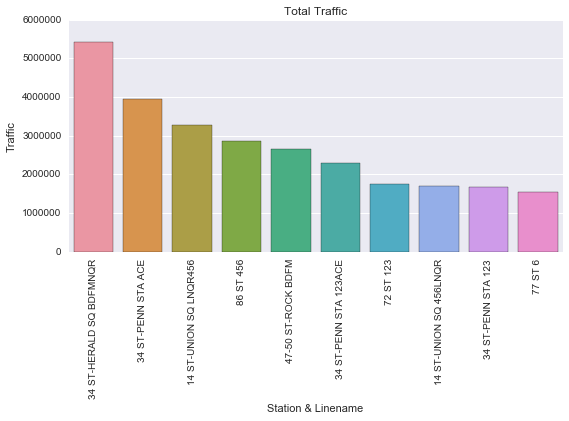

In [649]:
sns.factorplot('stat_line', 'traffic', data = df2, kind = 'bar', aspect = 2)
plt.xticks(rotation=90)
plt.xlabel('Station & Linename')
plt.ylabel('Traffic')
plt.title("Total Traffic")

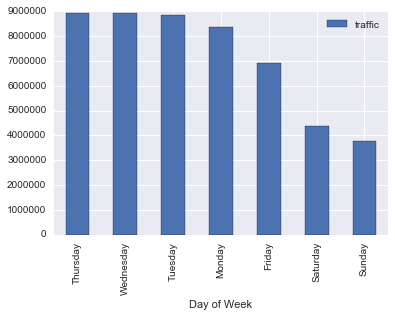

In [443]:
day_traffic.plot(kind='bar', x='day_of_week', y='traffic')
plt.xlabel('Day of Week')

In [459]:
stations = df_stations.groupby(by =['station', 'linename', '']).sum().sort_values('traffic', ascending = False)

In [460]:
stations = stations.reset_index()

In [461]:
top_stations = stations.sort('traffic', ascending = False)

/Users/colekev/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [463]:
top_stations.head(16)

,station,linename,entries,exits,net_entries,net_exits,traffic
0,34 ST-HERALD SQ,BDFMNQR,70551495230,46125938674,2844340,2587280,5431620
1,34 ST-PENN STA,ACE,243559065385,89694762702,2046226,1893490,3939716
2,14 ST-UNION SQ,LNQR456,187821956091,71364751535,1766651,1517637,3284288
3,86 ST,456,34086518703,30814799664,1509946,1362758,2872704
4,47-50 ST-ROCK,BDFM,39333106264,30881736655,1312048,1354337,2666385
5,34 ST-PENN STA,123ACE,30388278364,11850605744,1355076,941289,2296365
6,72 ST,123,16029749693,12345361481,909824,845173,1754997
7,14 ST-UNION SQ,456LNQR,21323452844,9581400754,867120,834179,1701299
8,34 ST-PENN STA,123,20715933684,18573161472,815248,857862,1673110
9,77 ST,6,210546001199,34688379112,793300,740500,1533800


In [ ]:
stations = four_hour.groupby(by =['station', 'linename', 'day_of_week','time']).sum().sort_values('traffic', ascending = False)

In [464]:
stations.to_csv('~/Desktop/top_15_stations.csv')

In [533]:
station = "14 ST-UNION SQ"
linename = "23"

station = df_stations[df_stations['station'] == station]
#station = station[station['linename'] == linename]


In [534]:
day_traffic = station.groupby(['mid_time']).sum().sort_values('traffic', ascending = False)

In [535]:
day_traffic = day_traffic.reset_index()

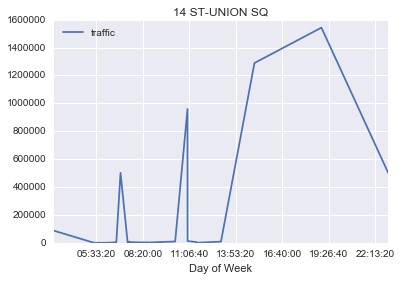

In [537]:
day_traffic.plot(x='mid_time', y='traffic')
plt.xlabel('Day of Week')
plt.title("14 ST-UNION SQ")